In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Wine.csv')

In [3]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [5]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [10]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [11]:
X = StandardScaler().fit_transform(X)

In [12]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [13]:
principal_df = pd.DataFrame(data=X, columns=['PC1', 'PC2'])

In [14]:
principal_df = pd.concat([principal_df,data[['Customer_Segment']]], axis=1)

In [15]:
principal_df.head()

,PC1,PC2,Customer_Segment
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1


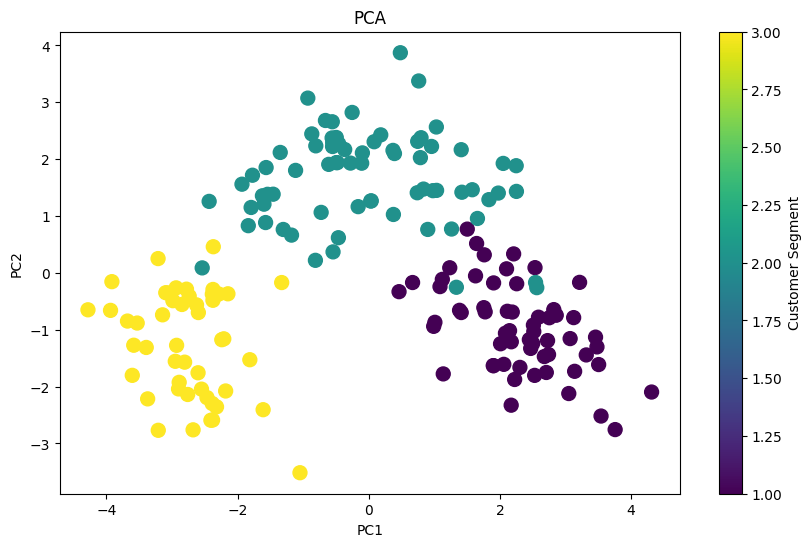

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['Customer_Segment'],s=100,cmap="viridis")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.colorbar(label="Customer Segment")
plt.show()

In [23]:
explain_variances = pca.explained_variance_ratio_
explain_variances

array([0.36198848, 0.1920749 ])

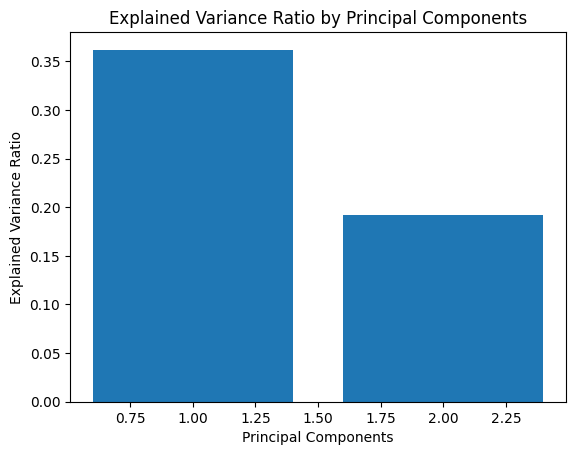

In [24]:
plt.bar(range(1,len(explain_variances)+1),explain_variances, label='Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

In [27]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_df = pd.DataFrame(data=loadings, columns=['PC1', 'PC2'], index=data.columns[:-1])

In [28]:
loading_df.head()

,PC1,PC2
Alcohol,0.313977,-0.766413
Malic_Acid,-0.533385,-0.356434
Ash,-0.004462,-0.500855
Ash_Alcanity,-0.520622,0.016782
Magnesium,0.308892,-0.474812


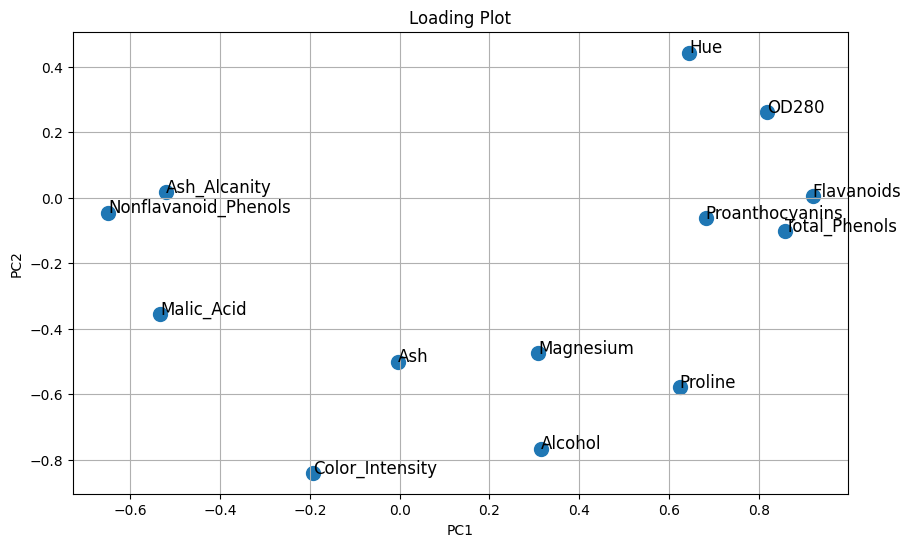

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(loading_df['PC1'], loading_df['PC2'], s=100)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Loading Plot')
for i in loading_df.index:
    plt.text(loading_df['PC1'][i], loading_df['PC2'][i], i, fontsize=12)
plt.grid()
plt.show()

Without Using PCA module

In [41]:
df = pd.read_csv('Wine.csv')
X = df.iloc[:,:-1]
X.shape

(178, 13)

In [42]:
X_mean = X.mean()
X_std = X.std()
Z = (X-X_mean)/X_std

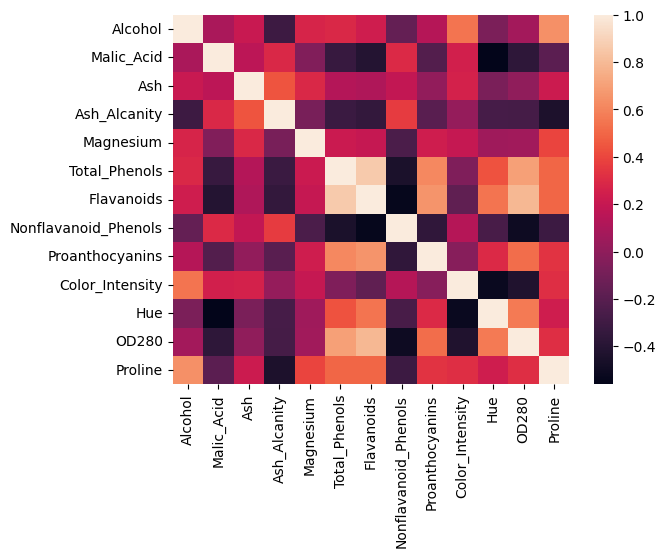

In [43]:
c = Z.cov()
import seaborn as sns
sns.heatmap(c)
plt.show()

In [44]:
eignevalues,eigenvectors = np.linalg.eig(c)
eignevalues

array([4.70585025, 2.49697373, 1.44607197, 0.91897392, 0.85322818,
       0.64165703, 0.55102831, 0.10337794, 0.34849736, 0.16877023,
       0.28887994, 0.22578864, 0.25090248])

In [45]:
eigenvectors

array([[-0.1443294 ,  0.48365155,  0.20738262, -0.0178563 , -0.26566365,
         0.21353865,  0.05639636, -0.01496997,  0.39613926, -0.26628645,
        -0.50861912, -0.22591696,  0.21160473],
       [ 0.24518758,  0.22493093, -0.08901289,  0.53689028,  0.03521363,
         0.53681385, -0.42052391, -0.02596375,  0.06582674,  0.12169604,
         0.07528304,  0.07648554, -0.30907994],
       [ 0.00205106,  0.31606881, -0.6262239 , -0.21417556, -0.14302547,
         0.15447466,  0.14917061,  0.14121803, -0.17026002, -0.04962237,
         0.30769445, -0.49869142, -0.02712539],
       [ 0.23932041, -0.0105905 , -0.61208035,  0.06085941,  0.06610294,
        -0.10082451,  0.28696914, -0.09168285,  0.42797018, -0.05574287,
        -0.20044931,  0.47931378,  0.05279942],
       [-0.14199204,  0.299634  , -0.13075693, -0.35179658,  0.72704851,
         0.03814394, -0.3228833 , -0.05677422, -0.15636143,  0.06222011,
        -0.27140257,  0.07128891,  0.06787022],
       [-0.39466085,  0.065039

In [46]:
idx = eignevalues.argsort()[::-1]
eignevalues = eignevalues[idx]
eigenvectors = eigenvectors[:,idx]

In [47]:
explained_var = np.cumsum(eignevalues)/np.sum(eignevalues)
explained_var

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

In [49]:
n_comp = np.argmax(explained_var>0.95)
n_comp

9

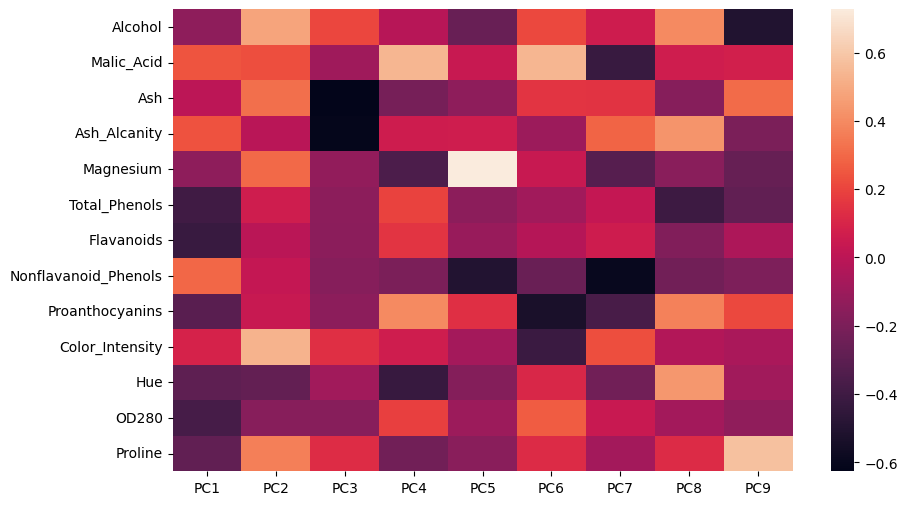

In [52]:
u = eigenvectors[:,:n_comp]
pca_comp = pd.DataFrame(u,columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'],index = X.columns)
plt.figure(figsize=(10,6))
sns.heatmap(pca_comp)
plt.show()

In [54]:
z_pca = Z @ pca_comp
z_pca.rename(columns = {'PC1':'PC1','PC2':'PC2','PC3':'PC3','PC4':'PC4','PC5':'PC5','PC6':'PC6','PC7':'PC7','PC8':'PC8','PC9':'PC9'},inplace = True)
z_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-3.307421,1.439402,0.165273,-0.215025,0.691093,0.223250,-0.594749,-0.064956,-0.639638
1,-2.203250,-0.332455,2.020757,-0.290539,-0.256930,0.924512,-0.053624,-1.021534,0.307978
2,-2.509661,1.028251,-0.980054,0.722863,-0.250327,-0.547731,-0.423012,0.343248,1.174521
3,-3.746497,2.748618,0.175696,0.566386,-0.310964,-0.114109,0.382259,-0.641783,-0.052397
4,-1.006070,0.867384,-2.020987,-0.408613,0.297618,0.405376,-0.442825,-0.415528,-0.325900
